# Implementation of k-means algorithm

In [5]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [6]:
X, y = make_blobs(n_samples=150,n_features=2,centers=3,cluster_std=0.5,shuffle=True,random_state=0)

In [7]:
km = KMeans(n_clusters=3,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0)

In [8]:
# We predict the cluster labels
y_km=km.fit_predict(X)

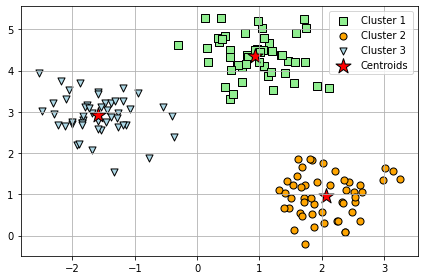

In [9]:
plt.scatter(X[y_km == 0, 0],X[y_km == 0, 1],s=50, c='lightgreen',marker='s', edgecolor='black',label='Cluster 1')

plt.scatter(X[y_km == 1, 0],X[y_km == 1, 1],s=50, c='orange',marker='o', edgecolor='black',label='Cluster 2')

plt.scatter(X[y_km == 2, 0],X[y_km == 2, 1],s=50, c='lightblue',marker='v', edgecolor='black',label='Cluster 3')

plt.scatter(km.cluster_centers_[:, 0],km.cluster_centers_[:, 1],s=250,marker='*',c='red',edgecolor='black',label='Centroids')

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

- The dataset that we just created consists of 150 randomly generated points that are roughly grouped into three regions with higher density, which is visualized via a two-dimensional scatterplot
- We set the number of desired clusters to 3; specifying the number of clusters a priori is one of the limitations of k-means.
- We set n_init=10 to run the k-means clustering algorithms 10 times independently, with different random centroids to choose the final model as the one with the lowest SSE.
- Via the max_iter parameter, we specify the maximum number of iterations for each single run (here, 300). 

- Note that the k-means implementation in scikit-learn stops early if it converges before the maximum number of iterations is reached. 
- However, it is possible that k-means does not reach convergence for a particular run, which can be problematic (computationally expensive) if we choose relatively large values for max_iter.
- One way to deal with convergence problems is to choose larger values for tol, which is a parameter that controls the tolerance with regard to the changes in the within-cluster SSE to declare convergence. In the preceding code, we chose a tolerance of 1e-04 (0.0001).

# k-means++ algorithm

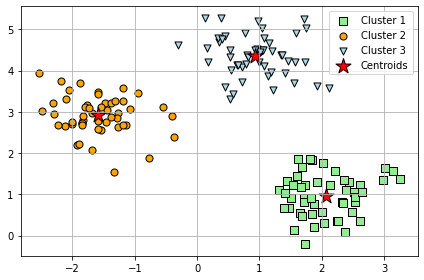

In [10]:
X, y = make_blobs(n_samples=150,n_features=2,centers=3,cluster_std=0.5,shuffle=True,random_state=0)
km = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=0)
y_km=km.fit_predict(X)

plt.scatter(X[y_km == 0, 0],X[y_km == 0, 1],s=50, c='lightgreen',marker='s', edgecolor='black',label='Cluster 1')

plt.scatter(X[y_km == 1, 0],X[y_km == 1, 1],s=50, c='orange',marker='o', edgecolor='black',label='Cluster 2')

plt.scatter(X[y_km == 2, 0],X[y_km == 2, 1],s=50, c='lightblue',marker='v', edgecolor='black',label='Cluster 3')

plt.scatter(km.cluster_centers_[:, 0],km.cluster_centers_[:, 1],s=250,marker='*',c='red',edgecolor='black',label='Centroids')

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

# Using the elbow method to find the optimal number of clusters

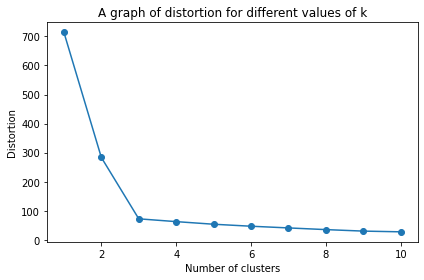

In [11]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('A graph of distortion for different values of k')
plt.tight_layout()
plt.show()

In [12]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 27.77


 From the graph, the elbow is located at k = 3, so this is evidence that k = 3 is indeed a good choice for this dataset:

# Quantifying the quality of clustering via silhouette plots

In [13]:
km = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=0)
y_km = km.fit_predict(X)

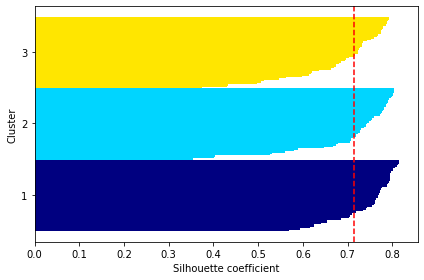

In [14]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,y_km,metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),c_silhouette_vals,height=1.0,edgecolor='none',color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color="red",linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

- Through a visual inspection of the silhouette plot, we can quickly scrutinize the sizes of the different clusters and identify clusters that contain outliers.
- However, as you can see in the preceding silhouette plot, the silhouette coefficients are not even close to 0, which is, in this case, an indicator of a good clustering.
- Furthermore, to summarize the goodness of our clustering, we added the average silhouette coefficient to the plot (red dotted line).

### To see what a silhouette plot looks like for a relatively bad clustering, let's seed the k-means algorithm with only two centroids:

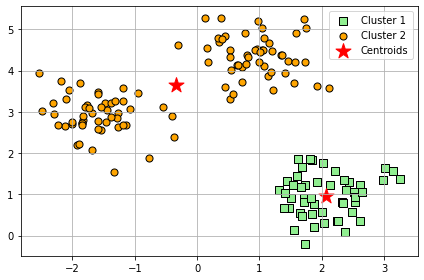

In [15]:
km = KMeans(n_clusters=2,init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=0)

y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0],X[y_km == 0, 1],s=50, c='lightgreen',edgecolor='black',marker='s',label='Cluster 1')

plt.scatter(X[y_km == 1, 0],X[y_km == 1, 1],s=50,c='orange',edgecolor='black',marker='o',label='Cluster 2')

plt.scatter(km.cluster_centers_[:, 0],km.cluster_centers_[:, 1],s=250,marker='*',c='red',label='Centroids')

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

- As seen in the preceeding plot, one of the centroids falls between two of the three spherical groupings of the input data.
- Although the clustering does not look completely terrible, it is suboptimal.
- So, next, we will create the silhouette plot to evaluate the results.

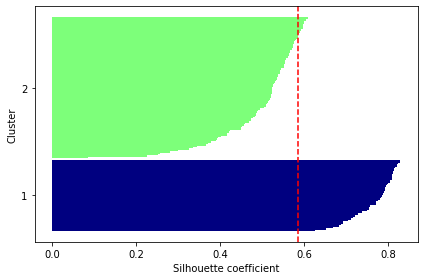

In [16]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,y_km,metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0

yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),c_silhouette_vals,height=1.0,edgecolor='none',color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

- From the preceeding plot, it can be seen that the silhouettes now have visibly different lengths and widths, which is evidence of a relatively bad or at least suboptimal clustering.

# Grouping clusters in bottom-up fashion

In [17]:
# We generate a random data sample
import pandas as pd
import numpy as np
np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)

In [18]:
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [19]:
# To calculate the distance matrix as input for the hierarchical clustering algorithm, we will use the pdist function
# from SciPy's spatial.distance submodule.

from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),columns=labels, index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [20]:
# Next, we will apply the complete linkage agglomeration to our clusters using the linkage function
# from SciPy's cluster.hierarchy submodule, which returns a so-called linkage matrix.

In [21]:
# Using the condensed distance matrix as shown in the following code example yields the correct linkage matrix:

from scipy.cluster.hierarchy import linkage
row_clusters = linkage(pdist(df, metric='euclidean'),method='complete')

In [22]:
'''
Using the complete input example matrix (the so-called
design matrix) as shown in the following code snippet also leads to a correct
linkage matrix similar to the preceding approach:

row_clusters = linkage(df.values,method='complete',metric='euclidean')
'''

"\nUsing the complete input example matrix (the so-called\ndesign matrix) as shown in the following code snippet also leads to a correct\nlinkage matrix similar to the preceding approach:\n\nrow_clusters = linkage(df.values,method='complete',metric='euclidean')\n"

In [23]:
# To take a closer look at the clustering results, we can turn those results into a pandas DataFrame

pd.DataFrame(row_clusters,columns=['row label 1','row label 2','distance','no. of items in clust.'],
             index=['cluster %d' % (i + 1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


- The linkage matrix consists of several rows where each row represents one merge. 
- The first and second columns denote the most dissimilar members in each cluster, and the third column reports the distance between those members.

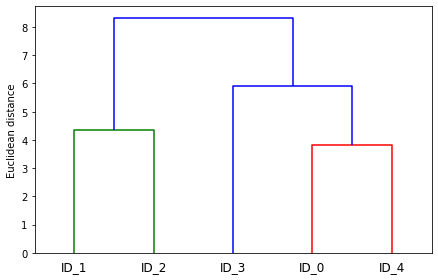

In [24]:
# Now that we have computed the linkage matrix, we can visualize the results in the form of a dendrogram

from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
 
row_dendr = dendrogram(row_clusters,labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

# Attaching dendrograms to a heat map

- In practical applications, hierarchical clustering dendrograms are often used in combination with a heat map, which allows us to represent the individual values in the data array or matrix containing our training examples with a color code. 
- Here, we will discuss how to attach a dendrogram to a heat map plot and order the rows in the heat map correspondingly.
- However, attaching a dendrogram to a heat map can be a little bit tricky, so let's go through this procedure step by step:

1. We create a new figure object and define the x axis position, y axis position, width, and height of the dendrogram via the add_axes attribute. Furthermore, we rotate the dendrogram 90 degrees counter-clockwise.

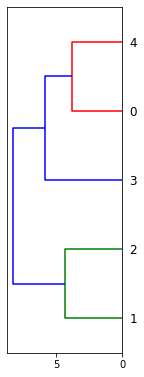

In [25]:
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters,orientation='left')

2. Next, we reorder the data in our initial DataFrame according to the clustering labels that can be accessed from the dendrogram object, which is essentially a Python dictionary, via the leaves key.

In [26]:
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

3. Now, we construct the heat map from the reordered DataFrame and position it next to the dendrogram.

In [27]:
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust,interpolation='nearest',cmap='hot_r')

4. Finally, we modify the aesthetics of the dendrogram by removing the axisticks and hiding the axis spines. Also, we add a color bar and assign the feature and data record names to the x and y axis tick labels, respectively.

In [28]:
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

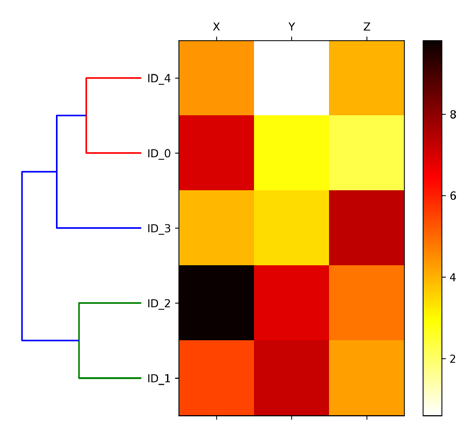

# Applying agglomerative clustering via scikit-learn

- Previously, we saw how to perform agglomerative hierarchical clustering using SciPy. 
- However, there is also an AgglomerativeClustering implementation in scikit-learn, which allows us to choose the number of clusters that we want to return. 
- This is useful if we want to prune the hierarchical cluster tree. 
- By setting the n_cluster parameter to 3, we will now cluster the input examples into three groups using the same complete linkage approach based on the Euclidean distance metric, as before.

In [30]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')

labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [1 0 0 2 1]


- Looking at the predicted cluster labels, we can see that the first and the fifth examples (ID_0 and ID_4) were assigned to one cluster (label 1), and the examples ID_1 and ID_2 were assigned to a second cluster (label 0). 
- The example ID_3 was put into its own cluster (label 2). 
- Overall, the results are consistent with the results that we observed in the dendrogram. 
- We should note, though, that ID_3 is more similar to ID_4 and ID_0 than to ID_1 and ID_2, as shown in the preceding dendrogram figure; this is not clear from scikit-learn's clustering results. 
- Let's now rerun the AgglomerativeClustering using n_cluster=2.

In [31]:
ac = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [0 1 1 0 0]


We can see that, in this pruned clustering hierarchy, label ID_3 was assigned to the same cluster as ID_0 and ID_4, as expected.

# Comparing k-means clustering, hierarchical clustering, and DBSCAN

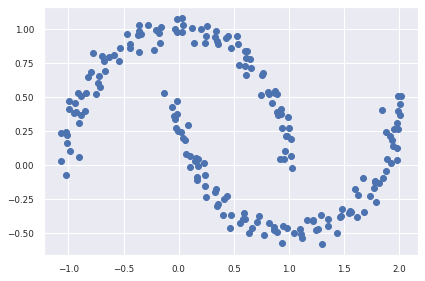

In [32]:
# Let's create a new dataset of half-moon-shaped structures.

from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=200,noise=0.05,random_state=0)

plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
plt.show()

- As seen in the precceding plot, there are two visible, half-moon-shaped groups consisting of 100 examples (data points) each.

In [ ]:
'''
We will start by using the k-means algorithm and complete linkage clustering to see 
if one of those previously discussed clustering algorithms can successfully identify
the half-moon shapes as separate clusters.
'''

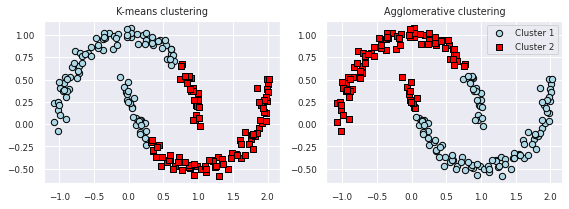

In [35]:
f,(ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

km = KMeans(n_clusters=2,random_state=0)

y_km = km.fit_predict(X)

ax1.scatter(X[y_km == 0, 0],X[y_km == 0, 1],c='lightblue',edgecolor='black',marker='o',s=40,label='cluster 1')

ax1.scatter(X[y_km == 1, 0],X[y_km == 1, 1],c='red',edgecolor='black',marker='s',s=40,label='cluster 2')

ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='complete')

y_ac = ac.fit_predict(X)

ax2.scatter(X[y_ac == 0, 0],X[y_ac == 0, 1],c='lightblue',edgecolor='black',marker='o',s=40,label='Cluster 1')

ax2.scatter(X[y_ac == 1, 0],X[y_ac == 1, 1],c='red',edgecolor='black',marker='s',s=40,label='Cluster 2')

ax2.set_title('Agglomerative clustering')
plt.legend()
plt.tight_layout()
plt.show()

- Based on the visualized clustering results, we can see that the k-means algorithm was unable to separate the two clusters. 
- Also, the hierarchical clustering algorithm was challenged by those complex shapes.

In [ ]:
"""
Finally, let's try the DBSCAN algorithm on this dataset to see if it can find the two
half-moon-shaped clusters using a density-based approach.
"""

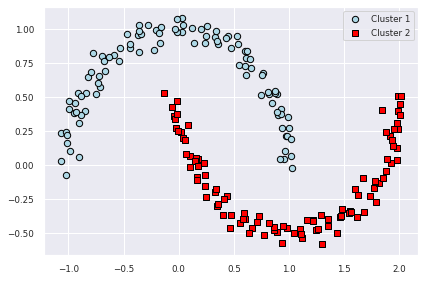

In [36]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2,min_samples=5,metric='euclidean')

y_db = db.fit_predict(X)

plt.scatter(X[y_db == 0, 0],X[y_db == 0, 1],c='lightblue',edgecolor='black',marker='o',s=40,label='Cluster 1')

plt.scatter(X[y_db == 1, 0],X[y_db == 1, 1],c='red',edgecolor='black',marker='s',s=40,label='Cluster 2')

plt.legend()
plt.tight_layout()
plt.show()

- We notice that the DBSCAN algorithm can successfully detect the half-moon shapes, which highlights one of the strengths of DBSCAN – clustering data of arbitrary shapes.